In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from src.data.toy_data import *
from src.model.boosted_support_subset import *
from src.visualization.plots import *
from src.utils import *

# Overlapping bivariate normals

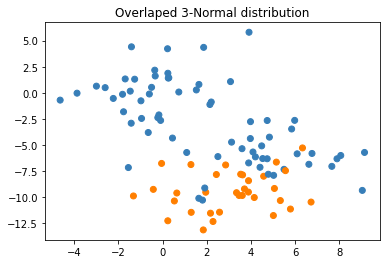

In [125]:
X, y = normal(n=100, prop_test=0.1, noise=2, centers=3, seed=156899)
plot_toy_set(X, y, 'Overlaped 3-Normal distribution')

## Random forest

In [126]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', criterion='gini',random_state=1324)

In [127]:
preds = StratifiedKFoldTestPredictions(X, y, rf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.58,0.06,0.64
1,0.09,0.27,0.36
total,0.67,0.33,1.00


In [128]:
rf.fit(X, y)

RandomForestClassifier(random_state=1324)

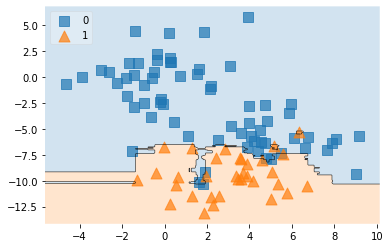

In [129]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, rf, title='')

## SVM

In [130]:
svm = SVC(C=1, gamma = 0.1)

In [131]:
preds = StratifiedKFoldTestPredictions(X, y, svm)
confusion_matrix(svm.predict(X), y)

real,0,1,total
pred,,,
0,0.62,0.03,0.65
1,0.05,0.30,0.35
total,0.67,0.33,1.00


In [132]:
svm.fit(X, y)

SVC(C=1, gamma=0.1)

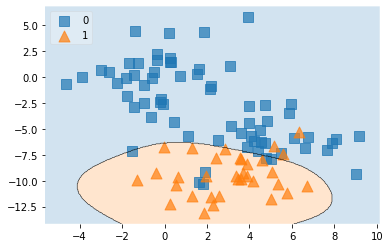

In [133]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, svm, title='')

## BSS

In [187]:
clf = BoostedSupportSubset(sample_size=30, n_learners=3)

In [188]:
pepe = set([0, 2, 3, 4, 6, 8, 12, 13, 14, 16, 17, 18, 19, 21, 22, 25, 31, 32, 36, 37, 43, 44, 46, 47, 50, 58, 60, 64, 65, 67, 70, 72, 73, 77, 84, 90, 91, 93, 95])
paco = set([5, 7, 10, 34, 38, 41, 49, 53, 54, 57, 69, 76, 80, 86, 89, 97])

In [189]:
pepe.intersection(paco)

set()

In [190]:
clf.fit(X, y)

0
active_idx:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
excluded_idx:  []


sample_idx:  [1, 9, 27, 29, 33, 35, 39, 40, 42, 48, 51, 56, 59, 61, 62, 63, 66, 68, 71, 74, 75, 79, 81, 82, 85, 87, 88, 94, 96, 98]
ss_indx:  [1, 33, 39, 48, 56, 62, 63, 63, 66, 68, 71, 74, 79, 87, 88, 94, 96]


1
active_idx:  [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 65, 67, 69, 70, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 95, 97, 98]
excluded_idx:  [1, 33, 

In [191]:
clf.learners

[{'data': {'train_indexes': array([40, 35, 81, 61, 98, 68, 85, 27, 39, 42, 33, 59, 63, 94, 56, 87, 96,
           1, 71, 82,  9, 51, 29, 88, 75, 74, 62, 66, 79, 48]),
   'support_subset_indexes': array([39, 33, 63,  1, 56, 87, 62, 48, 68, 94, 96, 71, 66, 63, 88, 74, 79])},
  'learner': SVC(C=1, kernel='linear', random_state=1234)},
 {'data': {'train_indexes': array([95, 69, 64, 49, 10, 60, 82, 67,  9, 14, 42, 76, 97, 52, 51, 16, 26,
           2, 15,  5, 45, 38, 46, 75, 34, 25, 31, 23, 58, 53]),
   'support_subset_indexes': array([10, 67, 52, 15, 23, 69, 42,  5, 38, 46, 64, 49, 67, 97,  2, 34, 95,
          10, 76, 16, 53])},
  'learner': SVC(C=1, kernel='linear', random_state=1234)}]

In [136]:
clf.learners

[{'data': {'train_indexes': array([40, 35, 81, 61, 98, 68, 85, 27, 39, 42, 33, 59, 63, 94, 56, 87, 96,
           1, 71, 82,  9, 51, 29, 88, 75, 74, 62, 66, 79, 48,  4, 64, 10, 93,
          57, 72, 36,  7, 54, 77, 21, 18, 70, 86, 22,  6, 44,  8, 41, 16]),
   'support_subset_indexes': array([39, 33, 63,  1, 74, 79,  8, 16, 27, 56, 87, 71, 29, 64, 36, 44, 68,
          94, 96, 62, 66, 48, 21, 86, 63, 88, 10, 57,  7, 54,  6, 41])},
  'learner': SVC(C=1, kernel='linear', random_state=1234)},
 {'data': {'train_indexes': array([13, 88, 92, 43, 48, 96, 47, 24, 98,  8, 61, 72,  9, 49,  0, 37, 74,
          53, 82, 32, 94, 63, 15, 85, 57, 44,  1, 14, 25, 84, 30,  4,  3,  5,
          58, 39, 22, 59, 65, 77, 86, 18, 97, 83, 36, 41, 29, 70, 55,  6]),
   'support_subset_indexes': array([13, 24,  8, 74, 32, 15,  1, 39, 83, 37, 85, 30,  4,  5, 58, 77, 18,
          36, 43, 48, 96, 47, 49, 94, 44, 86, 97, 29, 88,  0, 53, 63, 57,  3,
          65, 41,  6])},
  'learner': SVC(C=1, kernel='linear', ran

In [112]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.62,0.05,0.66
1,0.05,0.29,0.34
total,0.67,0.33,1.00


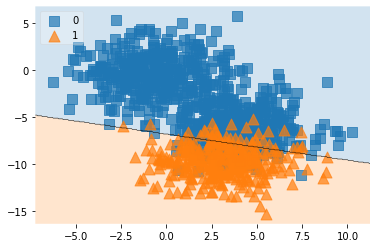

In [113]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

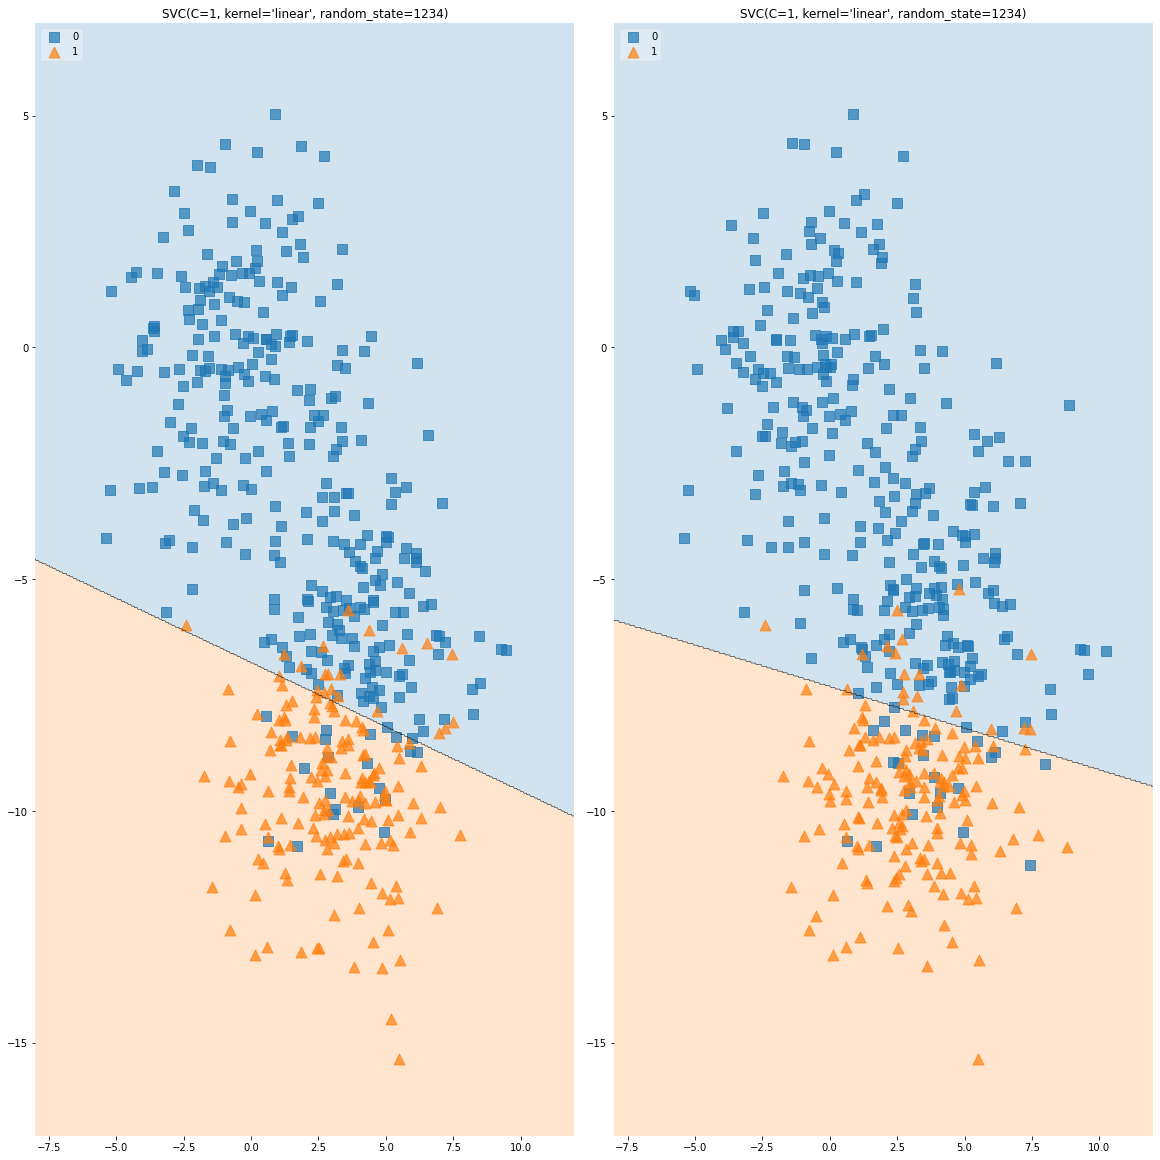

In [118]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners, zoom=0.1)

In [102]:
import numpy as np

In [103]:
pepe = np.array([1, 2, 3, 5, -2, 0, 3, -1, 0, -2])

In [105]:
pepe.argsort().argsort()

array([5, 6, 7, 9, 0, 3, 8, 2, 4, 1])